<center>
<h1> <b>Animation of VSI DC-Link Current</b></h1>

Dr. Bingsen Wang

6/24/2022
</center>


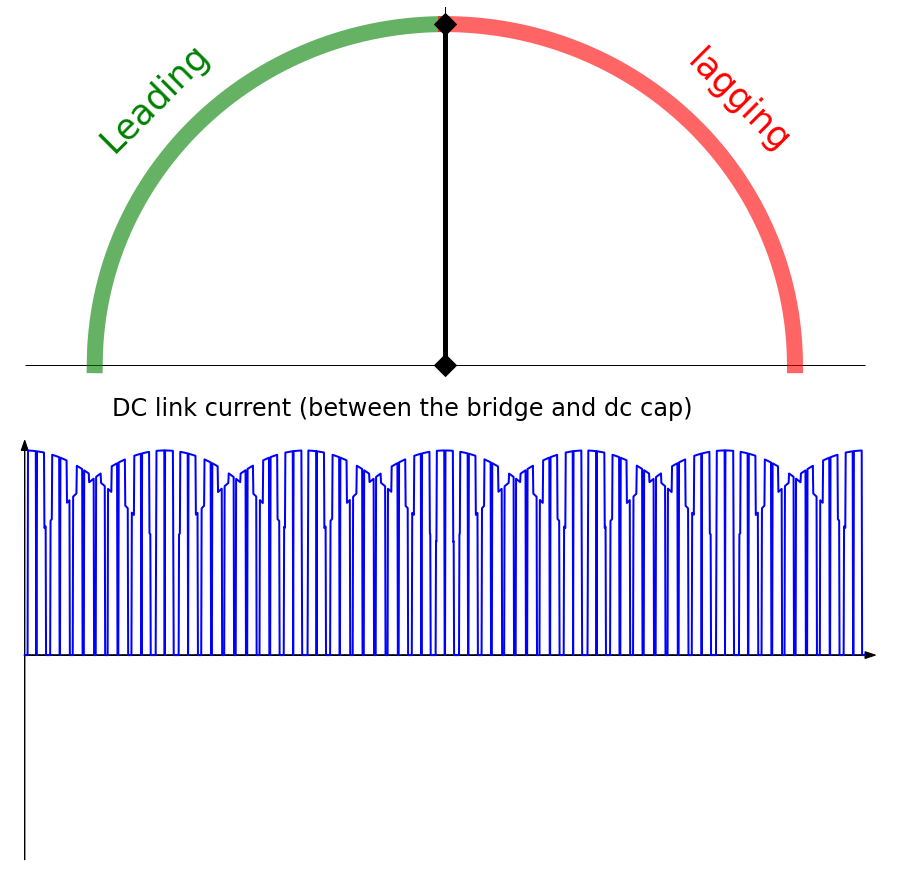

In [ ]:
import numpy as np
from numpy import linspace,cos,sin,arccos,pi,exp,heaviside,sqrt
import matplotlib.pyplot as plt
from matplotlib import animation,rc
rc('animation', html='jshtml')

#carrier waveform
def c(t,fs):
  return 1/pi*arccos(cos(2*pi*fs*t)) # carrier

# modulation functions
def m(t,MI,w):
  ma = 0.5+0.5*MI*cos(w*t)
  mb = 0.5+0.5*MI*cos(w*t - 2*pi/3)
  mc = 0.5+0.5*MI*cos(w*t + 2*pi/3)
  return ma,mb,mc,

# switching functions
def h(t,MI,w,fs):
  ha = heaviside(m(t,MI,w)[0] - c(t,fs), 0)
  hb = heaviside(m(t,MI,w)[1] - c(t,fs), 0)
  hc = heaviside(m(t,MI,w)[2] - c(t,fs), 0)
  return ha,hb,hc,


# load currents
def iac(t,w,Ipk,phi):
  ia = Ipk*cos(w*t + phi)
  ib = Ipk*cos(w*t + phi - 2*pi/3)
  ic = Ipk*cos(w*t + phi + 2*pi/3)
  return ia,ib,ic,

# dc current
def idc(t,w,fs,MI,Ipk,phi):
  i_dc=0
  for k in range(3):
    i_dc = i_dc + iac(t,w,Ipk,phi)[k]*h(t,MI,w,fs)[k]
  return  i_dc

f = 60 # fundamental frequency [Hz]
fs = f*36  # switching frequency
Ipk = 100 #load current peak

Nppf = 1024*2 # number of points per fundamental cycle
Nf = 120 #number of framem per half animation time
T_stop = 1/f # total time interval
t = linspace(0,T_stop,Nppf)
phi = np.concatenate([linspace(0,pi/2,Nf), linspace(pi/2,-pi/2,Nf*2),linspace(-pi/2,0,Nf)])


fig = plt.figure(figsize=(16,16))
ax = plt.axes(xlim=(-0.1, 5), ylim=(-2.5, 2.6))
plt.axis('off') #turn off the axis frames
xax_ln = 4.8 #length of x axis
yax_ln = xax_ln*0.5

# origins of each axis
x1= 0.5*xax_ln
y1 = 0.5
x2= 0
y2 = -1.2
theta=linspace(pi,0,500)


# plot x,y axes
ax.arrow(x1 - 0.5*xax_ln,y1,xax_ln,0,width=0.002,head_width=0.0, ec='k',fc='k')
ax.arrow(x1,y1,0,yax_ln,width=0.002,head_width=0.0, ec='k',fc='k')
ax.arrow(x2,y2,xax_ln,0,width=0.002,head_width=0.04, ec='k',fc='k')
ax.arrow(x2,-0.5*yax_ln+y2,0,yax_ln,width=0.002,head_width=0.04, ec='k',fc='k')
ax.plot(2*exp(1j*theta)[0:249].real+x1,2*exp(1j*theta[0:249]).imag+y1,'-g',lw=16,alpha=0.6)
ax.plot(2*exp(1j*theta)[250:500].real+x1,2*exp(1j*theta[250:500]).imag+y1,'-r',lw=16,alpha=0.6)


ax.text(x1 - 2,y1+1.25,'Leading',color='green',size = 35, rotation = 45)
ax.text(x1 + 1.35,y1+1.25,'Lagging',color='red',size = 35, rotation = -45)
ax.text(.5,.20,'DC link current (between the bridge and dc cap)',size=24)
line_pf, = plt.plot([],[],'-kD',lw=5,markersize=16)
line_idc, = plt.plot([],[],'-b',lw=2)

# initialization function: plot the background of each frame
def init():
  line_pf.set_data([],[])
  line_idc.set_data([],[])
  return line_pf,line_idc,

# animation function.  This is called sequentially
def animate(i): 
  line_pf.set_data([x1,x1+2*exp(1j*(phi[i]+pi/2)).real],[y1,y1+2*exp(1j*(phi[i]+pi/2)).imag])
  line_idc.set_data(x2+t/T_stop*xax_ln,y2+idc(t,2*pi*f,fs,0.95,Ipk,phi[i])/Ipk*yax_ln*.5)
  return line_pf,line_idc,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=4*Nf, interval=50, blit=True)
anim
# to save the animation, uncomment the following three lines
fn = r"PWMA_PFvsIdc_nimation.mp4" 
writervideo = animation.FFMpegWriter(fps=60) 
anim.save(fn, writer=writervideo)


